# MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target

X.shape, y.shape

((70000, 784), (70000,))

In [5]:
28 * 28

784

In [6]:
mnist.categories

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}

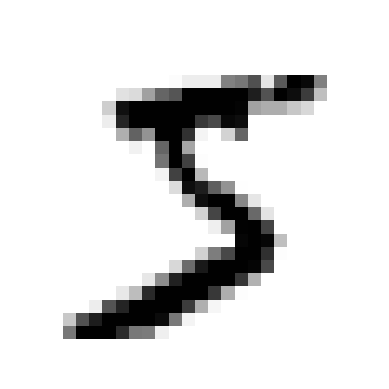

In [7]:
import matplotlib.pyplot as plt


def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

In [10]:
y_train_5 = y_train == "5"
y_test_5 = y_test == "5"

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

`cross_val_score` fn evaluate a model using k-fold cross-validation.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
cross_val_score(
    sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1, scoring="accuracy", verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished


array([0.95035, 0.96035, 0.9604 ])

On all k-fold the accuracy is higher than 95%. Does this metric make any sense?

In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
cross_val_score(
    dummy_clf, X_train, y_train_5, cv=3, n_jobs=-1, scoring="accuracy", verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


array([0.90965, 0.90965, 0.90965])

Apparently even a dummy classifier performs good in this sample. Is it the problem that simple? Probably not. 
Let's study the data distribution.

In [19]:
import numpy as np

np.unique_counts(y_train_5)

UniqueCountsResult(values=array([False,  True]), counts=array([54579,  5421]))

The value 5 is a value over 10 different values. So it makes sense that in the distribution we have 1/10 relationship ratio.
With this distribution it makes no sense to use the accuracy as saying that it is not 5 secures you to guess correctly 9/10 times. This is because the data is skewed.

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier


def _cross_val_score(clf, X, y):
    skfolds = StratifiedKFold(n_splits=3, shuffle=True)

    for train_index, test_index in skfolds.split(X, y):
        clone_clf = clone(clf)

        X_train_fold = X[train_index]
        X_test_fold = X[test_index]
        y_train_fold = y[train_index]
        y_test_fold = y[test_index]

        clone_clf.fit(X_train_fold, y_train_fold)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        print(n_correct / len(y_pred))


dummy_clf = DummyClassifier()
_cross_val_score(dummy_clf, X_train, y_train_5)

0.90965
0.90965
0.90965
